<a href="https://colab.research.google.com/github/simsekergun/Attention/blob/main/Qc_fullyconnected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required packages/modules
- `pip install torch`
- `pip install torchvision`
- `pip install GPUtil`

In [ ]:
!pip install gputil
!pip install psutil
!pip install humanize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=264d00bdb76670700c2ef3bc8a3dbea07f3f3ec6f1d61780399c7ce1a6268134
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/simsekergun/Attention.git
#%run /content/Attention/Attention.py
%run ./Attention/Attention.py

Cloning into 'Attention'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


/content/Attention/Attention.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
%mkdir ./csv_files_for_paper/
%mkdir ./png_files_for_paper/

In [ ]:
ls ./Attention

Attention.py                     Qc_Dataset1.pt  README.md
attnT_add_adamW_relu_relu.ipynb  Qc_Dataset2.pt


In [ ]:
Qc_vec1 = torch.load('./Attention/Qc_Dataset1.pt')
Qc_vec2 = torch.load('./Attention/Qc_Dataset2.pt')
Qc_Dataset = torch.cat((Qc_vec1, Qc_vec2), 0)
Qc_Dataset.shape

torch.Size([5748, 579])

In [ ]:
# Splitting into train and test datasets:
train_data, test_data = torch.utils.data.random_split(FC_Dataset(Qc_Dataset), (Qc_Dataset.shape[0]-1000, 1000)) 

In [ ]:
# Loading the data through DataLoader:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
# Defining a neural network:

num_features = train_data[0][0].shape[0]
num_targets = train_data[0][1].shape[0]
num_neurons = 512

activ = 'ReLU'

# del fc_model_1
fc_model_1 = nn.Sequential(
    getLayer(num_features, num_neurons, activation=activ),
    getLayer(num_neurons, num_neurons, activation=activ),
    getLayer(num_neurons, 2*num_neurons, activation=activ),
    getLayer(2*num_neurons, 2*num_neurons, activation=activ),
    getLayer(2*num_neurons, 4*num_neurons, activation=activ),
    getLayer(4*num_neurons, 4*num_neurons, activation=activ),
    nn.Linear(4*num_neurons, num_targets),
)

eta = 0.001
loss_func = nn.MSELoss()
optimizer = torch.optim.AdamW(fc_model_1.parameters(), lr=eta)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.3)

In [ ]:
# Execute function
mem_report()

CPU RAM Free: 12.5 GB
GPU 0 ... Mem Free: 15106MB / 15109MB | Utilization   0%


In [ ]:
# training the fully connected model
start = time.time()
fc_1_results = train_network_reg(fc_model_1, loss_func, train_loader, test_loader=test_loader, epochs=100, score_funcs={'R^2 score': r2_score}, 
                                device=device, optimizer=optimizer, lr_schedule=scheduler)
stop = time.time()
print('Processing time: %s sec' %(stop-start))

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Processing time: 186.23985815048218 sec


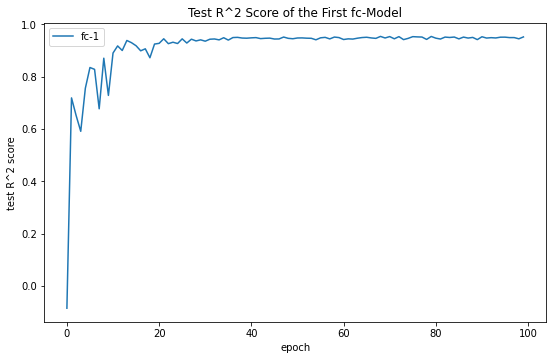

In [ ]:
# Plotting the accuracy of the fully connected model:
sns.lineplot(x='epoch', y='test R^2 score', data=fc_1_results, label='fc-1')
plt.title('Test R^2 Score of the First fc-Model')
plt.gcf().set_size_inches(9, 5.5)
plt.show()

In [ ]:
fc_1_results

,epoch,total time,train loss,test loss,train R^2 score,test R^2 score
0,0,1.578750,2.284562,1.468062,-0.678107,-0.084823
1,1,2.968497,0.827918,0.385213,0.394806,0.719032
2,2,4.357237,0.668615,0.477401,0.511200,0.651675
3,3,5.751509,0.701531,0.559935,0.487022,0.591297
4,4,7.148871,0.453122,0.334068,0.670081,0.756028
...,...,...,...,...,...,...
95,95,135.657391,0.086636,0.066786,0.936862,0.951199
96,96,137.069157,0.083578,0.068906,0.939239,0.949494
97,97,138.496267,0.086029,0.069193,0.937902,0.949580
98,98,140.015858,0.082493,0.075110,0.939505,0.944910


In [ ]:
fc_1_results.to_csv('./csv_files_for_paper/fc_1_results.csv',index=False)

In [ ]:
mem_report()

CPU RAM Free: 10.6 GB
GPU 0 ... Mem Free: 13671MB / 15109MB | Utilization  10%


In [ ]:
# used memory: 1.435 GB
# training: 3 minutes (186.24 seconds)
# training loss = 0.081361	 R^2 = 0.940095
# test     loss = 0.066080	 R^2 = 0.952113

15106-13671

1435